In [1]:
import pandas as pd

# Load the dataset
file_path = 'clean_air.csv'
air_quality_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
air_quality_data.head()

City  Year  Month  Day  Seasonality    PM2.5        PM10     NO    NO2  \
0     0  2015      1    1            0  82.6825  116.272721   0.92  18.22   
1     0  2015      1    2            0  82.6825  116.272721   0.97  15.69   
2     0  2015      1    3            0  82.6825  116.272721  17.40  19.30   
3     0  2015      1    4            0  82.6825  116.272721   1.70  18.48   
4     0  2015      1    5            0  82.6825  116.272721  22.10  21.42   

     NOx        NH3     CO    SO2      O3  Benzene  Toluene  Xylene  \
0  17.15  23.483476   0.92  27.64  133.36     0.00     0.02    0.00   
1  16.46  23.483476   0.97  24.55   34.06     3.68     5.50    3.77   
2  29.70  23.483476  17.40  29.07   30.70     6.80    16.40    2.25   
3  17.97  23.483476   1.70  18.59   36.08     4.43    10.14    1.00   
4  37.76  23.483476  22.10  39.33   39.31     7.01    18.89    2.78   

          AQI  AQI_Bucket  
0  350.333333           0  
1  350.333333           0  
2  350.333333           0  
3  350.333333           0  
4  350.333333           0

In [3]:
# Checking for missing values in the dataset
missing_values = air_quality_data.isnull().sum()
missing_values_percentage = (missing_values / len(air_quality_data)) * 100

missing_values, missing_values_percentage


(City           0
 Year           0
 Month          0
 Day            0
 Seasonality    0
 PM2.5          0
 PM10           0
 NO             0
 NO2            0
 NOx            0
 NH3            0
 CO             0
 SO2            0
 O3             0
 Benzene        0
 Toluene        0
 Xylene         0
 AQI            0
 AQI_Bucket     0
 dtype: int64,
 City           0.0
 Year           0.0
 Month          0.0
 Day            0.0
 Seasonality    0.0
 PM2.5          0.0
 PM10           0.0
 NO             0.0
 NO2            0.0
 NOx            0.0
 NH3            0.0
 CO             0.0
 SO2            0.0
 O3             0.0
 Benzene        0.0
 Toluene        0.0
 Xylene         0.0
 AQI            0.0
 AQI_Bucket     0.0
 dtype: float64)

In [4]:
from sklearn.preprocessing import StandardScaler

# Selecting relevant features for clustering
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
X = air_quality_data[features]

# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]  # Displaying the first few rows of the scaled data for confirmation


array([[ 0.25900146, -0.06430893, -0.74392704, -0.42228756, -0.5119777 ,
        -0.05519374, -0.20189566,  0.46690037,  4.69793381, -0.23097463,
        -0.46705557, -0.70492514,  1.34115646],
       [ 0.25900146, -0.06430893, -0.74186688, -0.52833685, -0.53437971,
        -0.05519374, -0.1950342 ,  0.32830486, -0.0073818 ,  0.01787854,
        -0.15989015,  0.14656533,  1.34115646],
       [ 0.25900146, -0.06430893, -0.06489901, -0.37701751, -0.10452099,
        -0.05519374,  2.05964261,  0.53104004, -0.1665949 ,  0.22886274,
         0.45107755, -0.19674117,  1.34115646],
       [ 0.25900146, -0.06430893, -0.71178857, -0.41138922, -0.48535503,
        -0.05519374, -0.09485684,  0.06098147,  0.08833559,  0.06859589,
         0.10019151, -0.4790656 ,  1.34115646],
       [ 0.25900146, -0.06430893,  0.12875582, -0.28815407,  0.15716038,
        -0.05519374,  2.70462015,  0.99123097,  0.24138866,  0.2430636 ,
         0.59064723, -0.07703562,  1.34115646]])

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

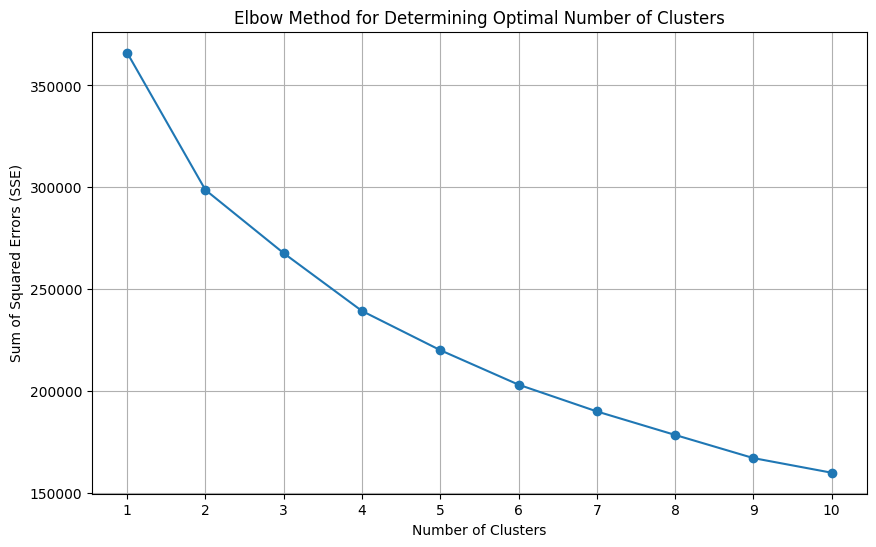

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determining the optimal number of clusters using the Elbow Method
sse = []  # Sum of squared errors
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


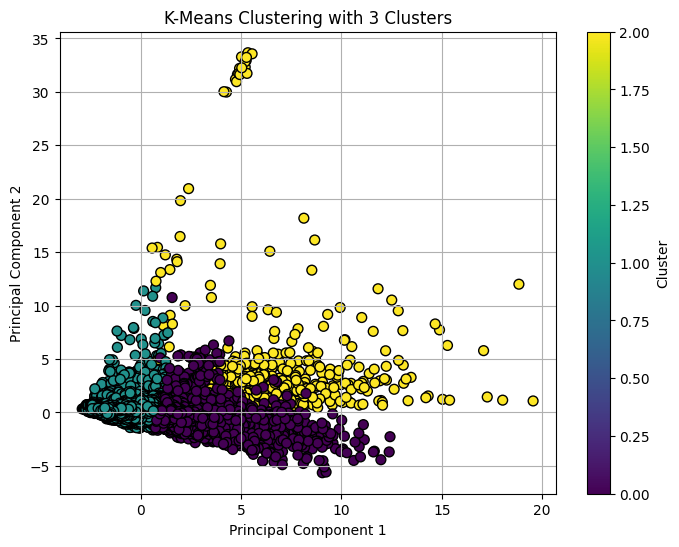

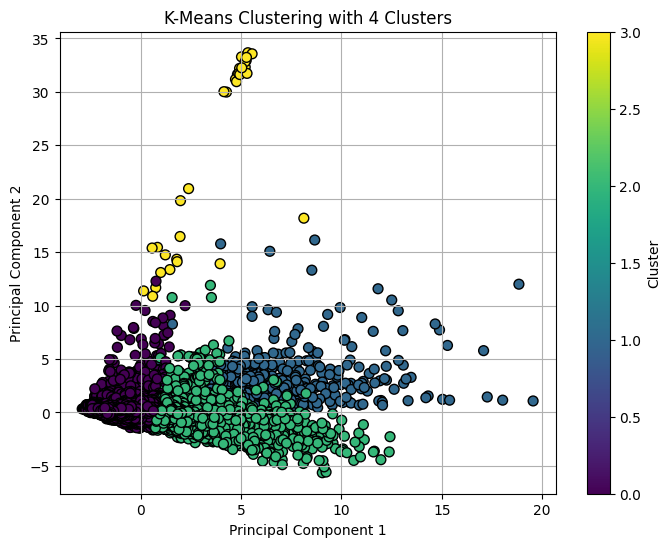

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt


# Function to perform KMeans clustering and PCA for visualization
def perform_clustering(n_clusters):
    # KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # PCA for dimensionality reduction for visualization
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X_scaled)

    # Creating a DataFrame for the PCA results
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['Cluster'] = cluster_labels

    return pca_df

# Performing clustering for 3 and 4 clusters
pca_df_3_clusters = perform_clustering(3)
pca_df_4_clusters = perform_clustering(4)

# Visualization function
def plot_clusters(pca_df, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.show()

# Plotting the results
plot_clusters(pca_df_3_clusters, 'K-Means Clustering with 3 Clusters')
plot_clusters(pca_df_4_clusters, 'K-Means Clustering with 4 Clusters')


c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


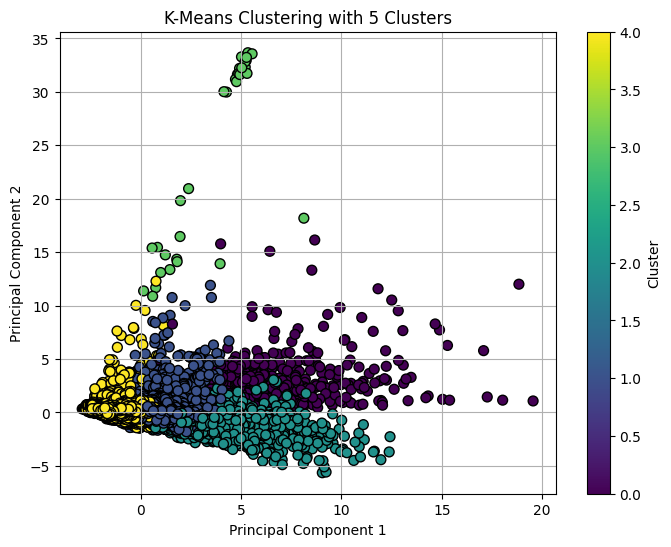

In [8]:
pca_df_5_clusters = perform_clustering(5)
plot_clusters(pca_df_5_clusters, 'K-Means Clustering with 5 Clusters')

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


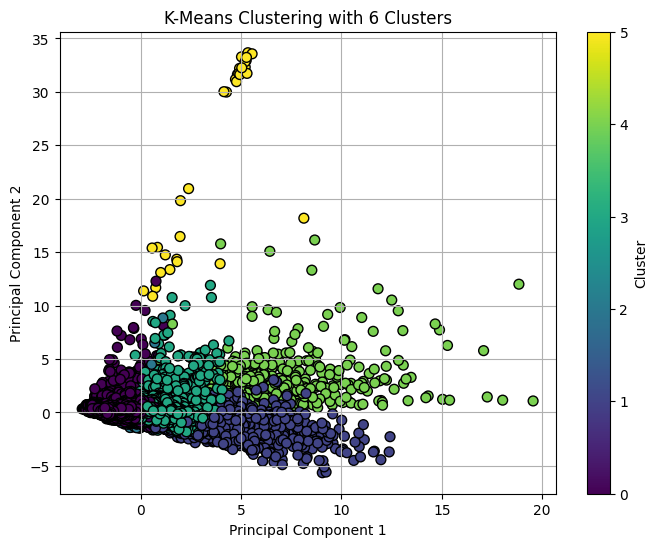

In [9]:
pca_df_6_clusters = perform_clustering(6)
plot_clusters(pca_df_6_clusters, 'K-Means Clustering with 6 Clusters')

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


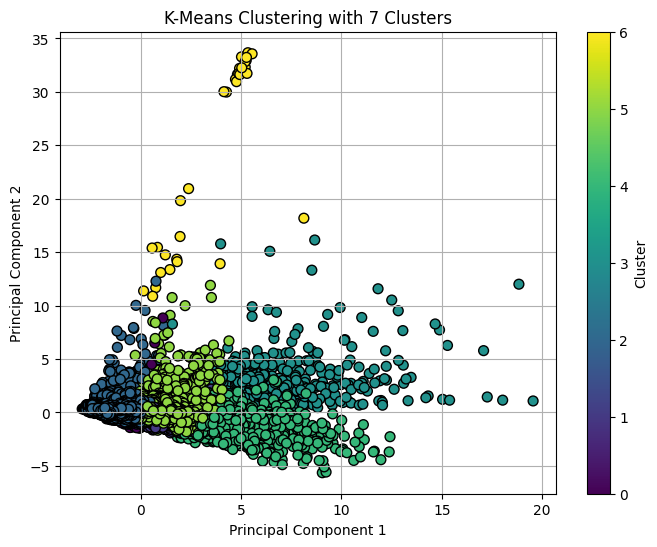

In [10]:
pca_df_7_clusters = perform_clustering(7)
plot_clusters(pca_df_7_clusters, 'K-Means Clustering with 7 Clusters')

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


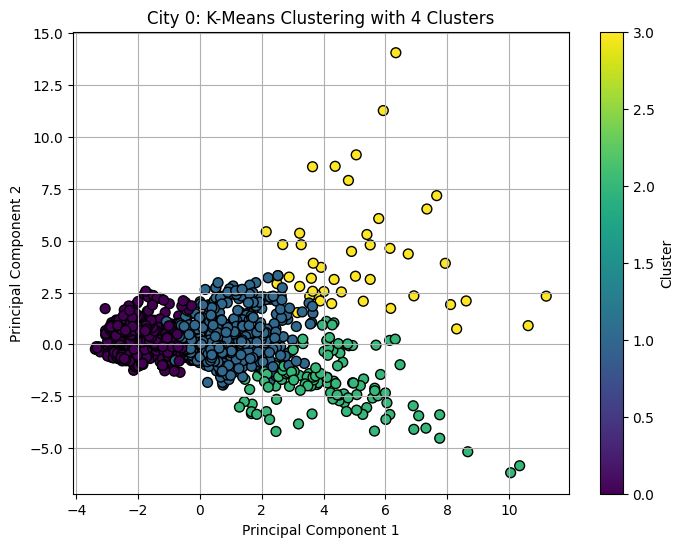

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


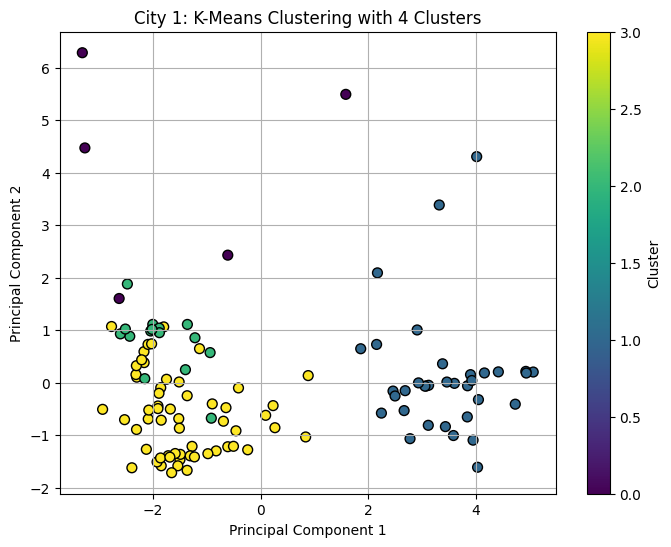

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


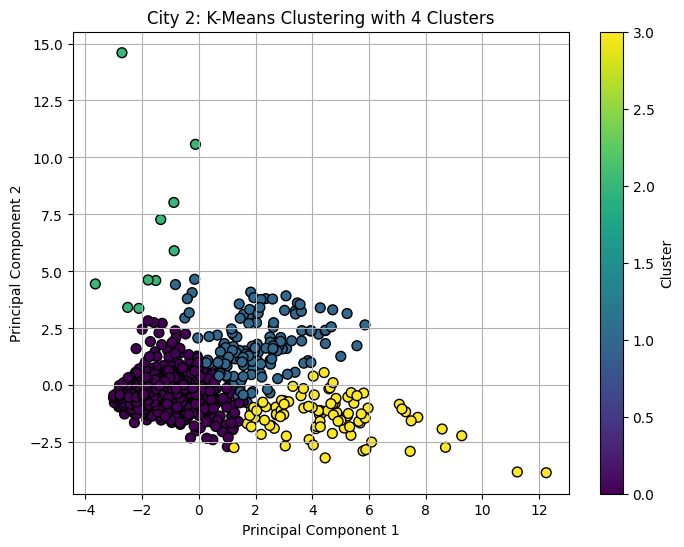

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


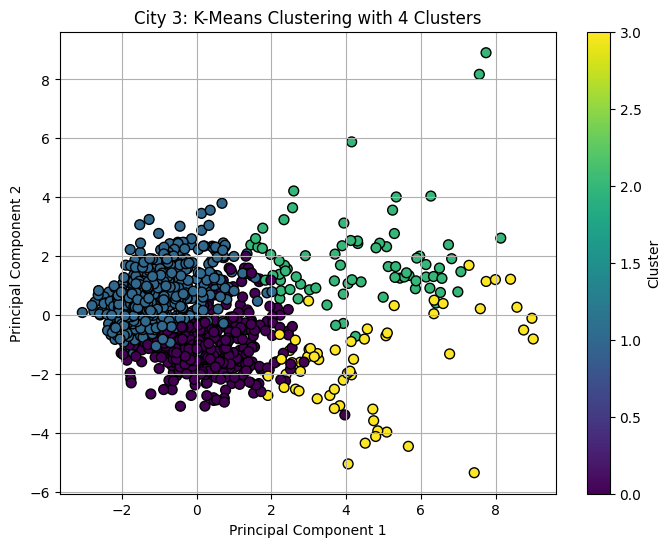

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


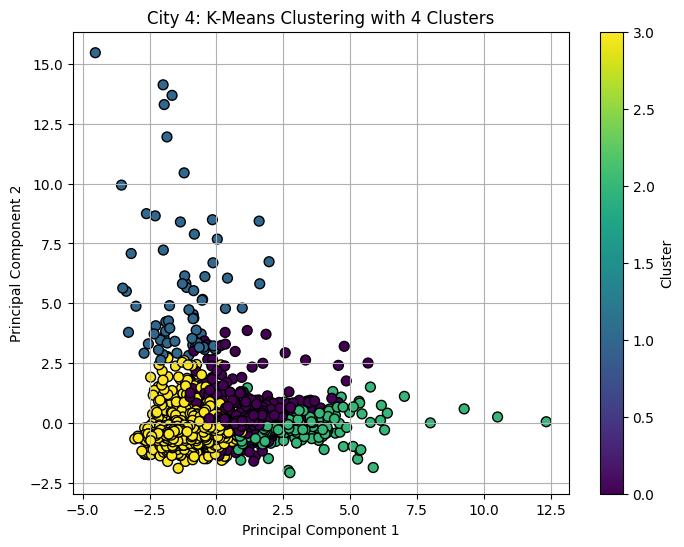

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


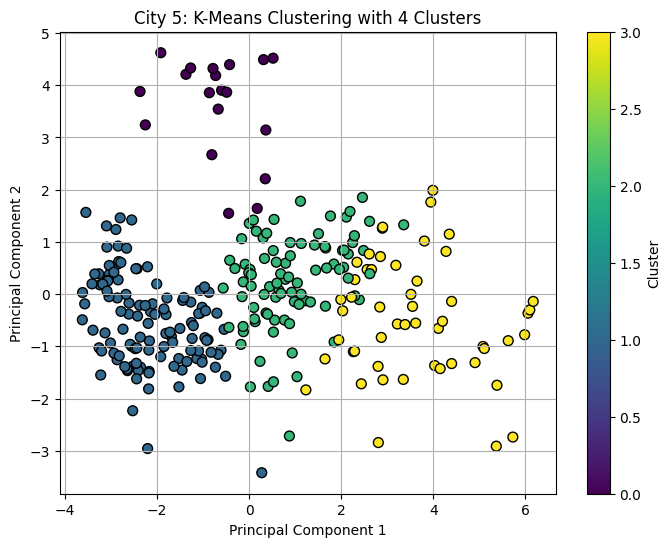

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


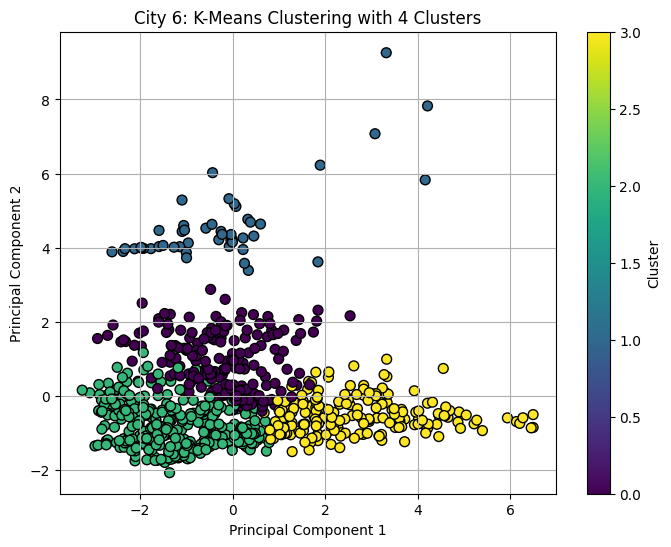

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


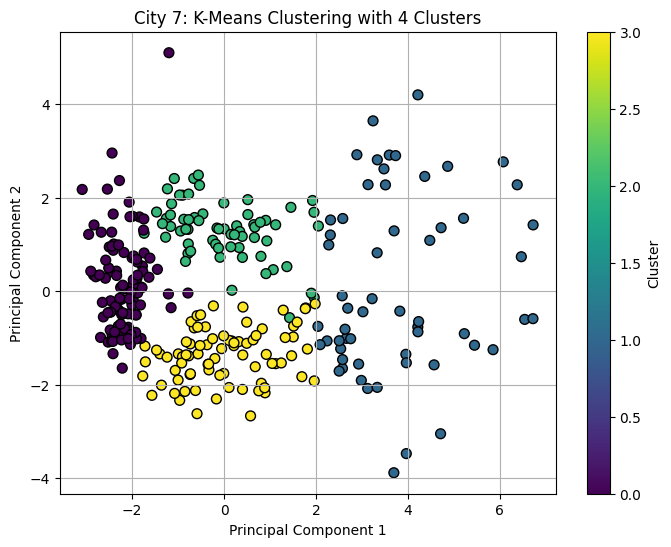

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


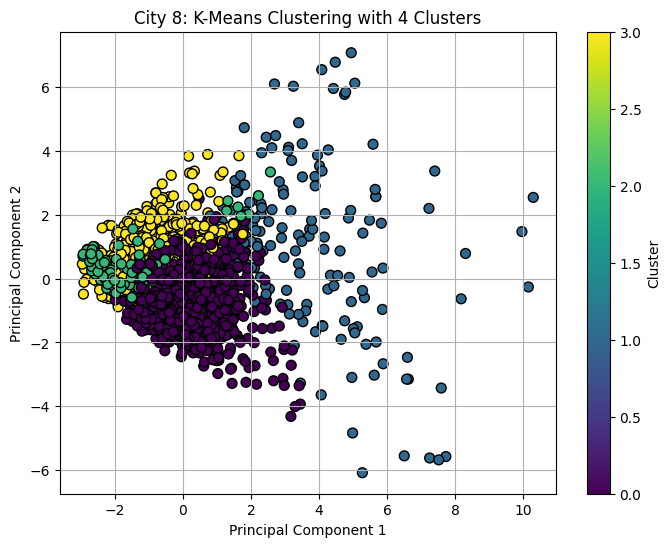

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


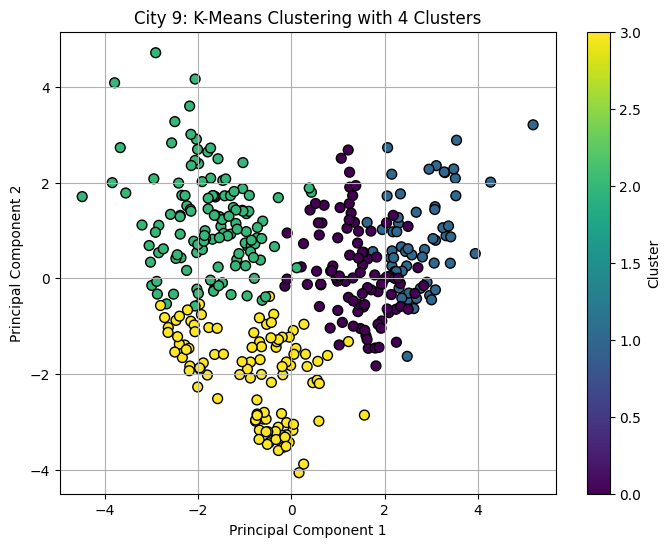

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


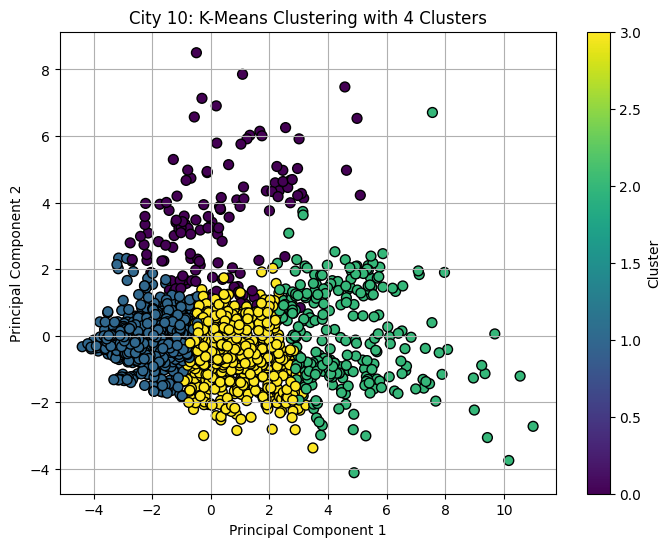

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


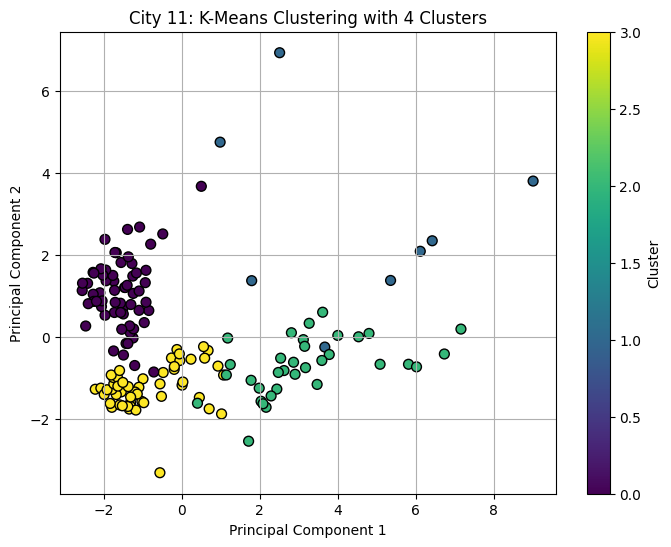

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


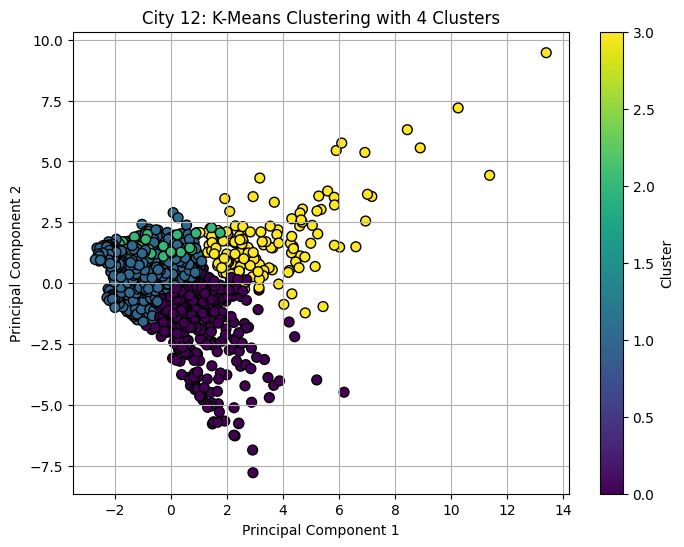

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


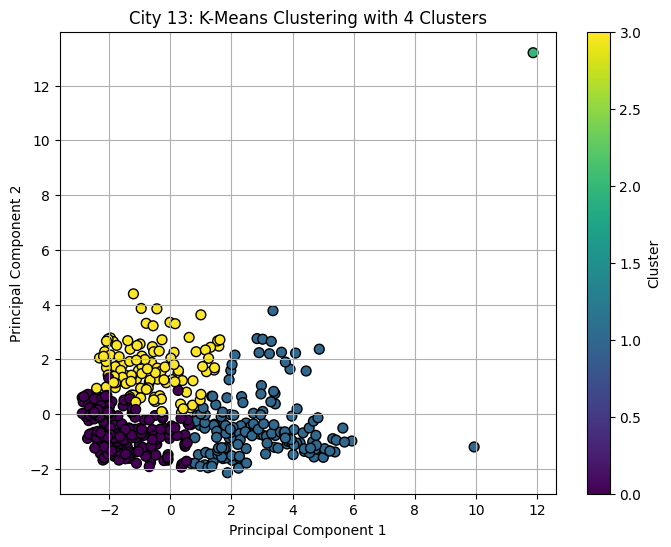

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


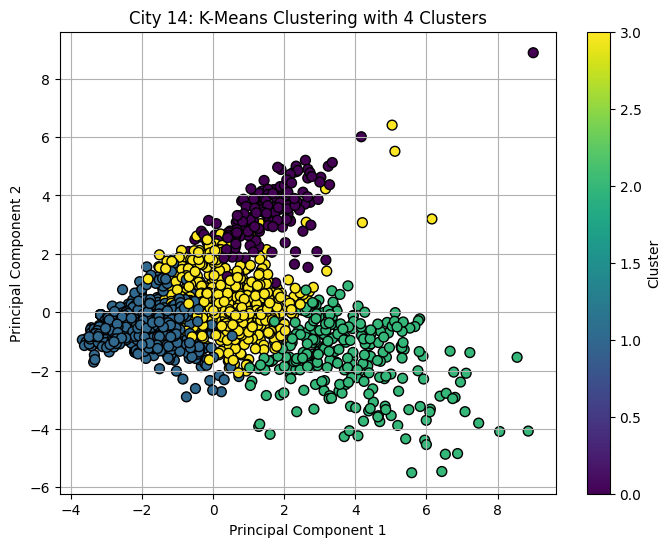

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


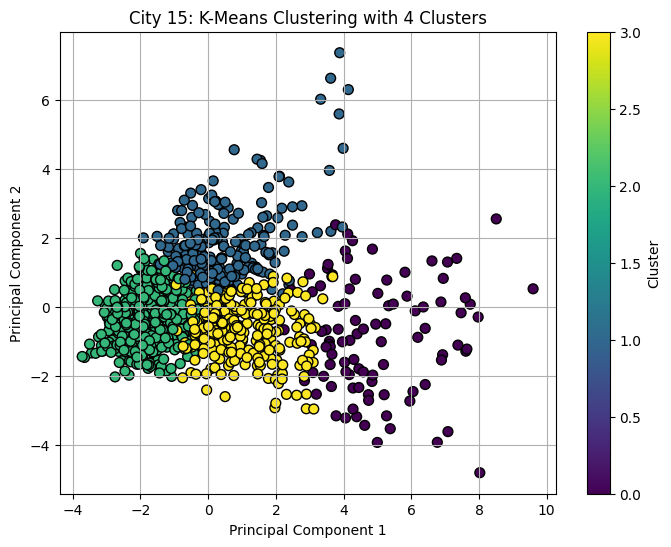

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


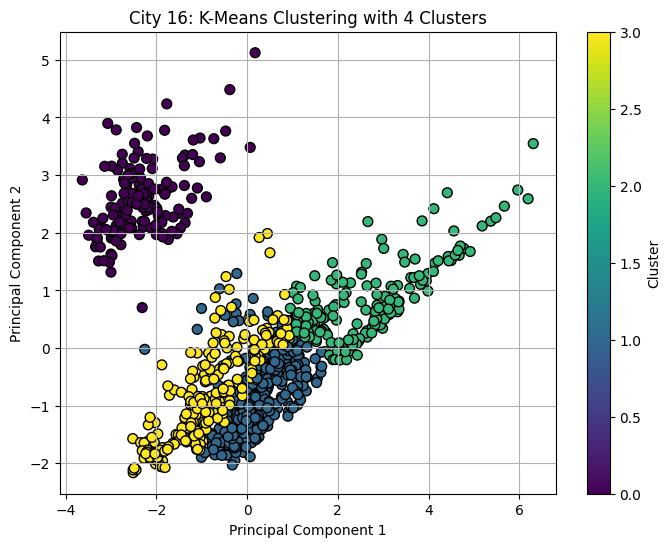

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


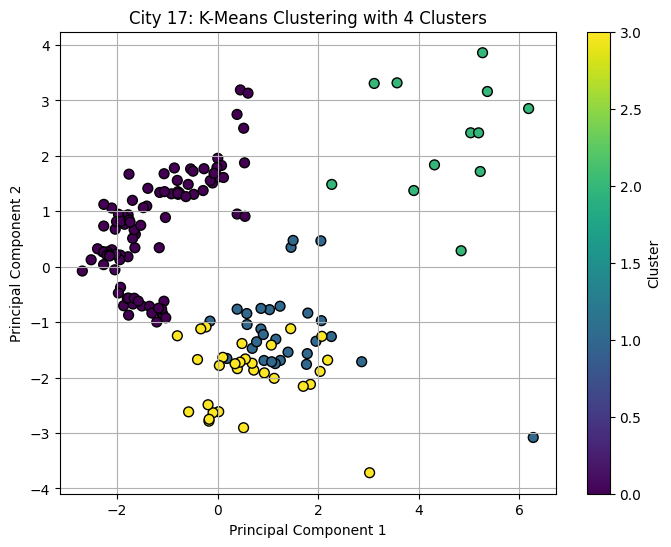

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


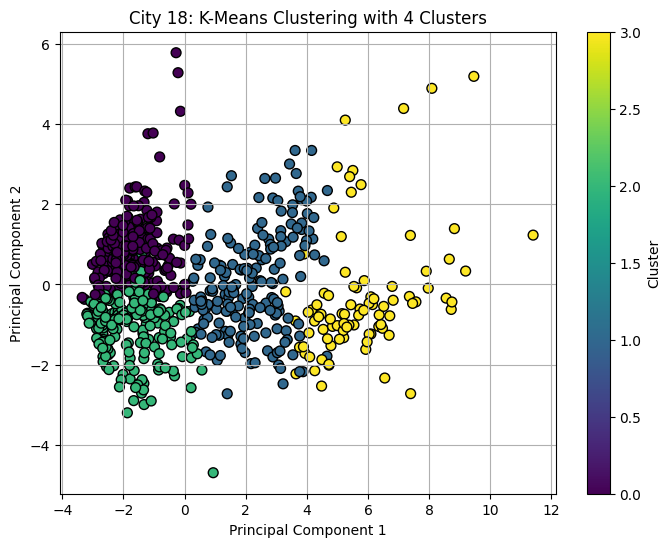

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


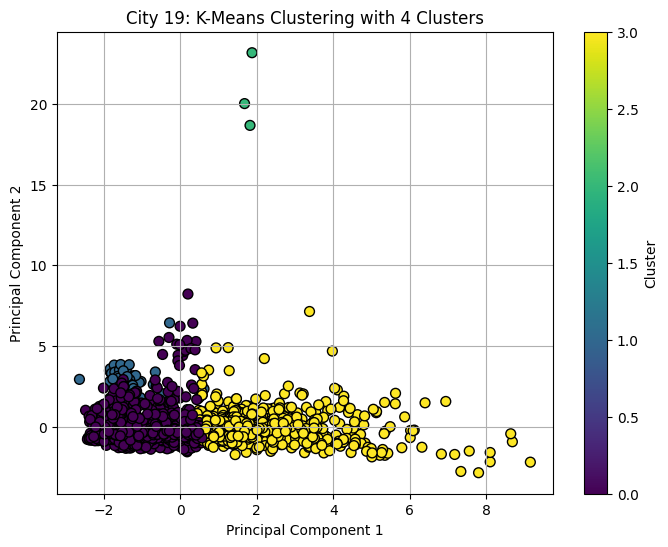

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


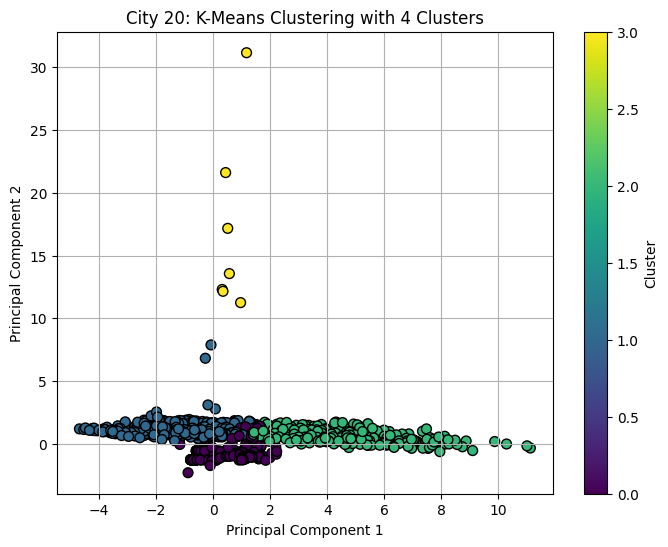

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


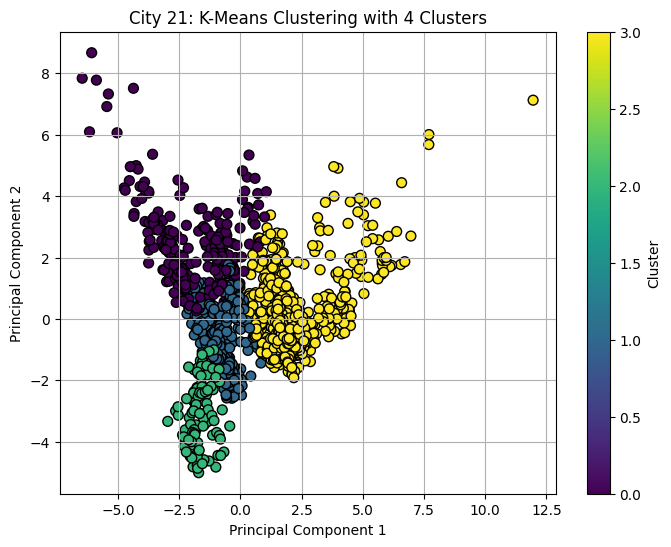

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


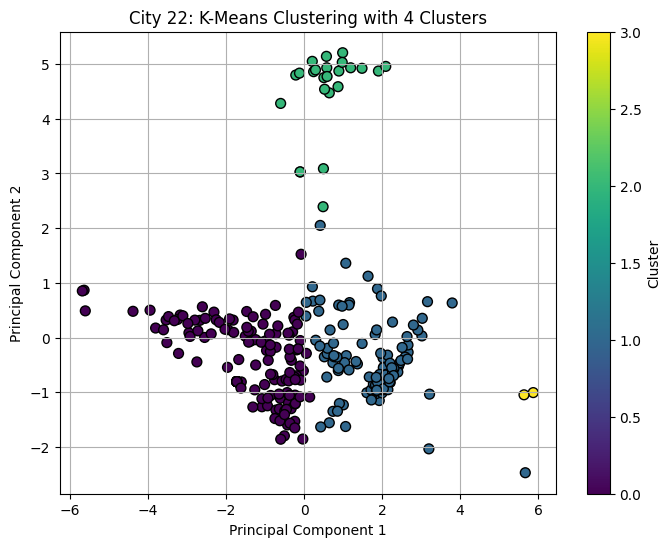

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


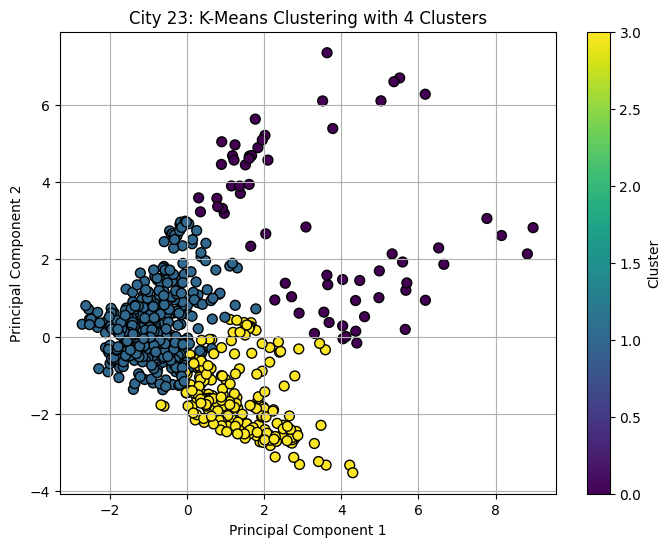

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


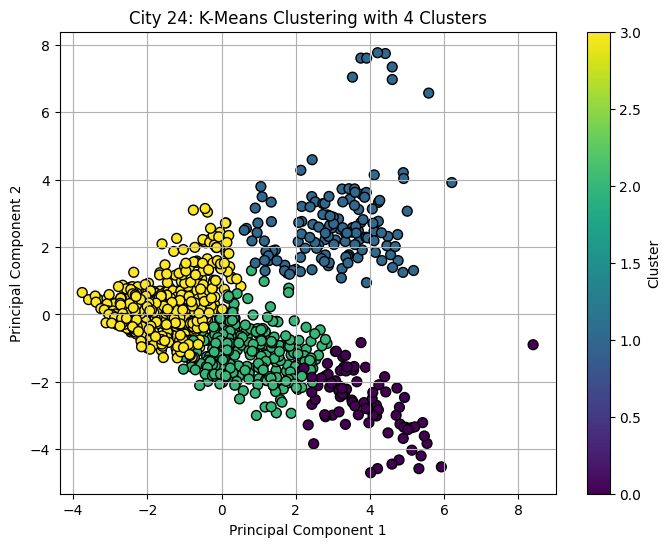

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


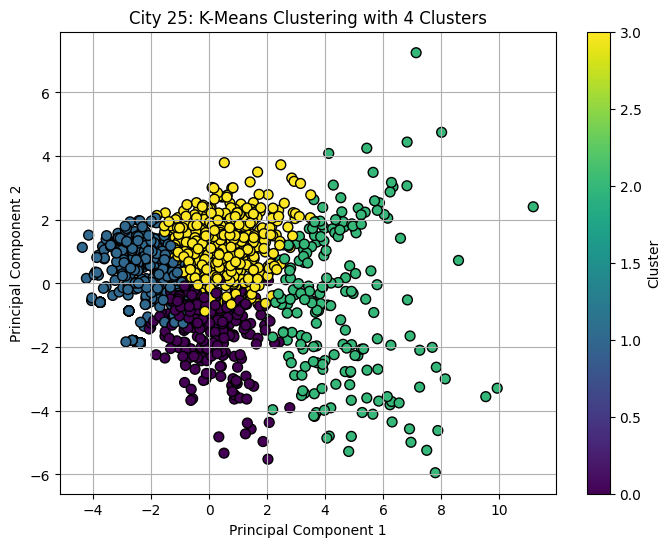

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def cluster_and_visualize(data, n_clusters):
    """
    Perform K-Means clustering on air quality data for each city and visualize the results.

    Parameters:
    data (DataFrame): The air quality dataset.
    n_clusters (int): The number of clusters to use for K-Means clustering.
    """

    # Selecting relevant features for clustering
    features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

    # Identifying unique cities
    unique_cities = data['City'].unique()

    for city in unique_cities:
        # Extract data for the city
        city_data = data[data['City'] == city][features]

        # Scale the features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(city_data)

        # KMeans clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)

        # PCA for dimensionality reduction
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(X_scaled)
        pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
        pca_df['Cluster'] = cluster_labels

        # Plotting
        plt.figure(figsize=(8, 6))
        plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
        plt.title(f'City {city}: K-Means Clustering with {n_clusters} Clusters')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(label='Cluster')
        plt.grid(True)
        plt.show()


# Example usage
cluster_and_visualize(air_quality_data, 4)  # You can change the number of clusters


c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


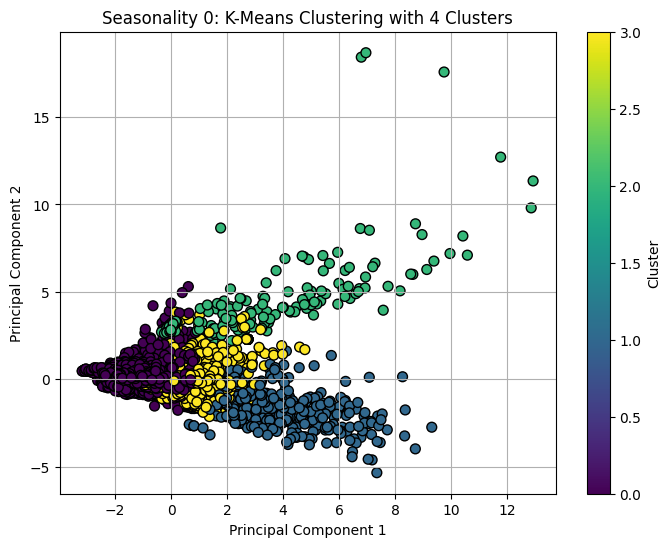

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


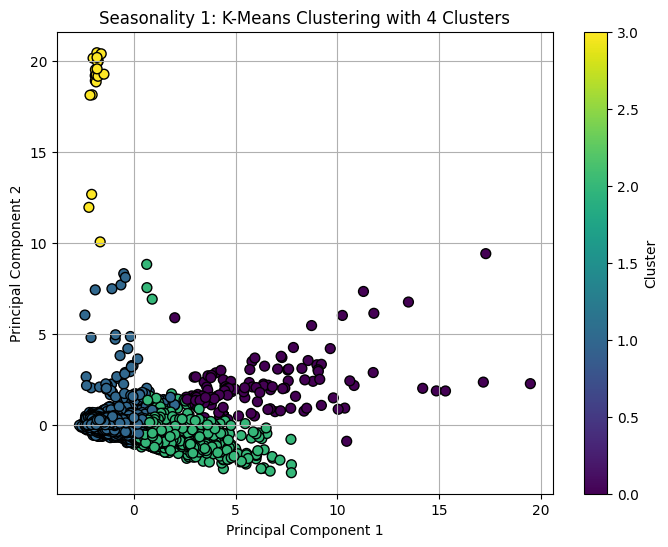

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


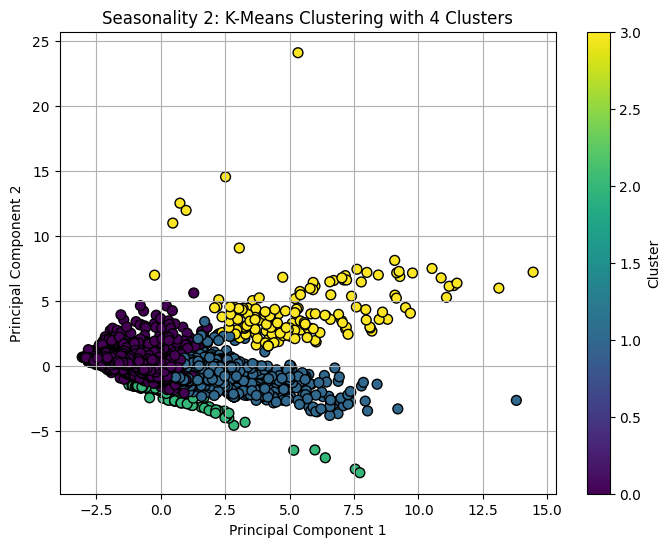

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


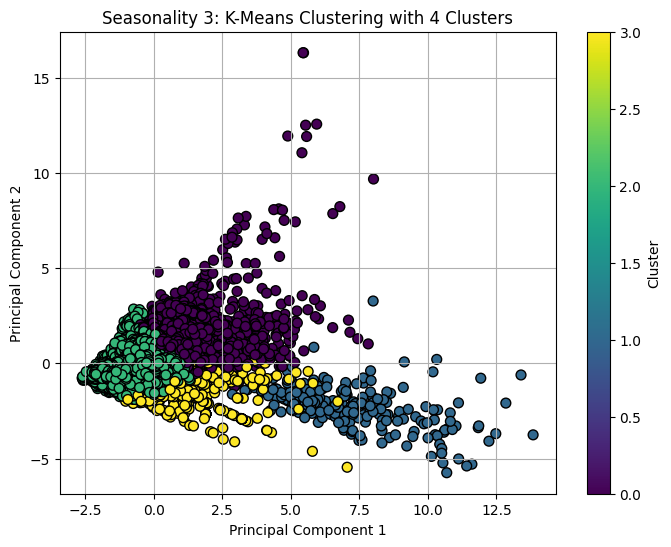

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


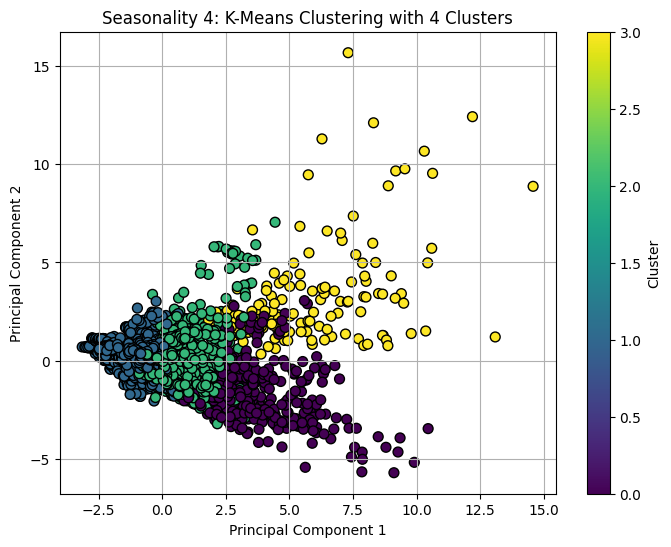

In [18]:
def cluster_and_visualize_by_seasonality(data, n_clusters):
    """
    Perform K-Means clustering on air quality data for each seasonality category and visualize the results.

    Parameters:
    data (DataFrame): The air quality dataset.
    n_clusters (int): The number of clusters to use for K-Means clustering.
    """

    # Selecting relevant features for clustering
    features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

    # Identifying unique seasonality categories
    unique_seasons = data['Seasonality'].unique()

    for season in unique_seasons:
        # Extract data for the seasonality category
        season_data = data[data['Seasonality'] == season][features]

        # Scale the features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(season_data)

        # KMeans clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)

        # PCA for dimensionality reduction
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(X_scaled)
        pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
        pca_df['Cluster'] = cluster_labels

        # Plotting
        plt.figure(figsize=(8, 6))
        plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
        plt.title(f'Seasonality {season}: K-Means Clustering with {n_clusters} Clusters')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(label='Cluster')
        plt.grid(True)
        plt.show()

# Example usage
cluster_and_visualize_by_seasonality(air_quality_data, 4)  # You can change the number of clusters

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


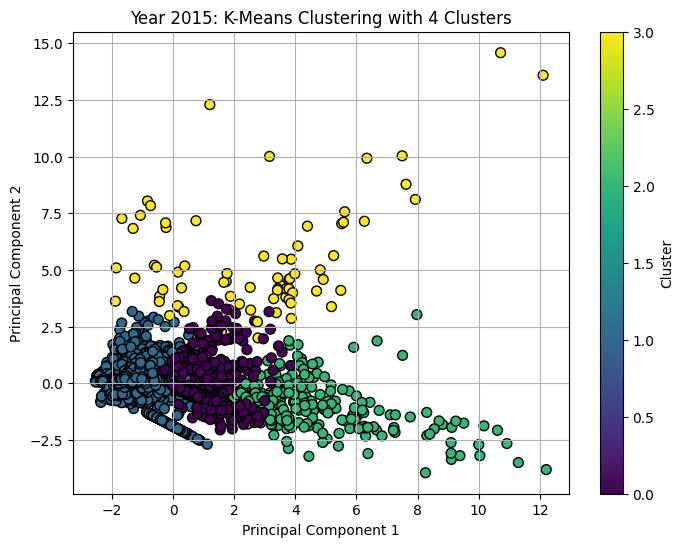

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


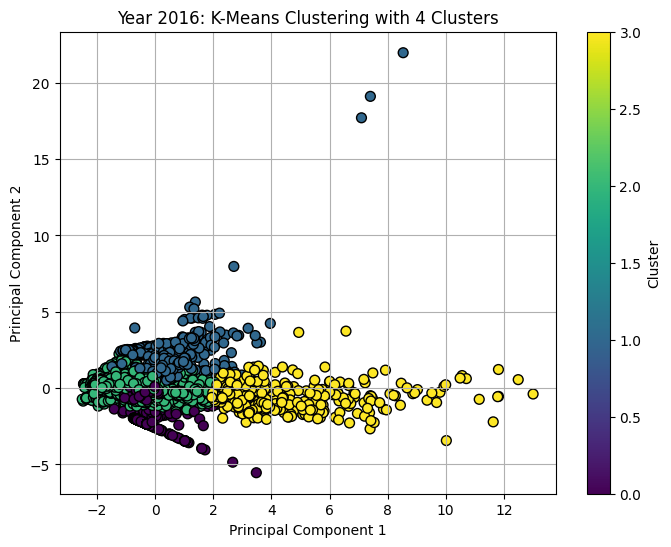

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


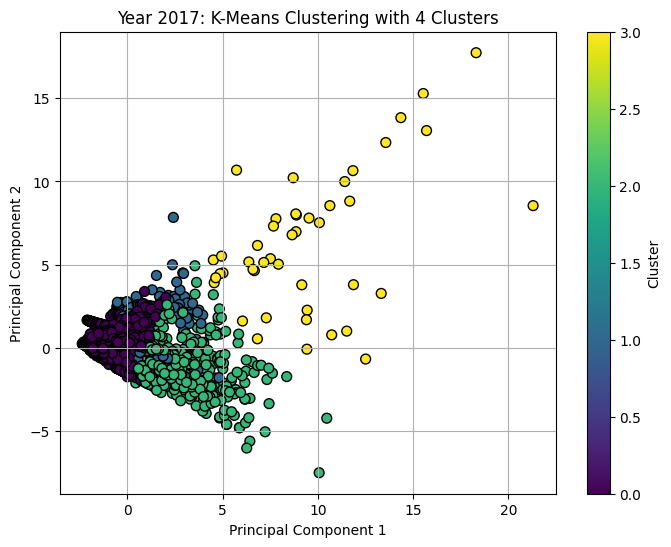

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


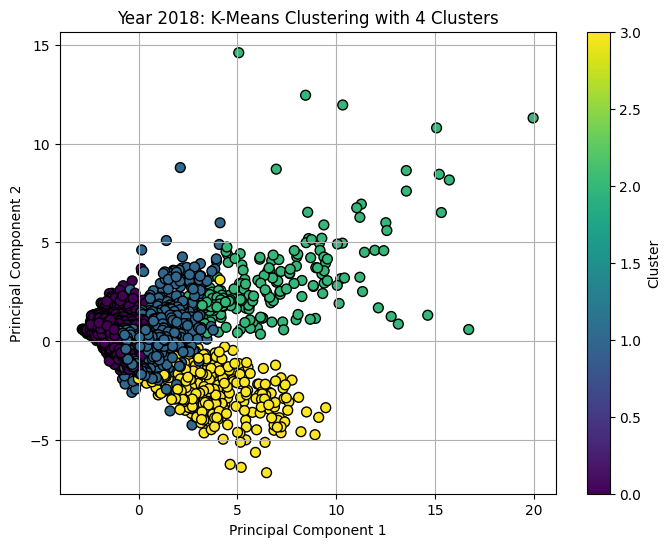

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


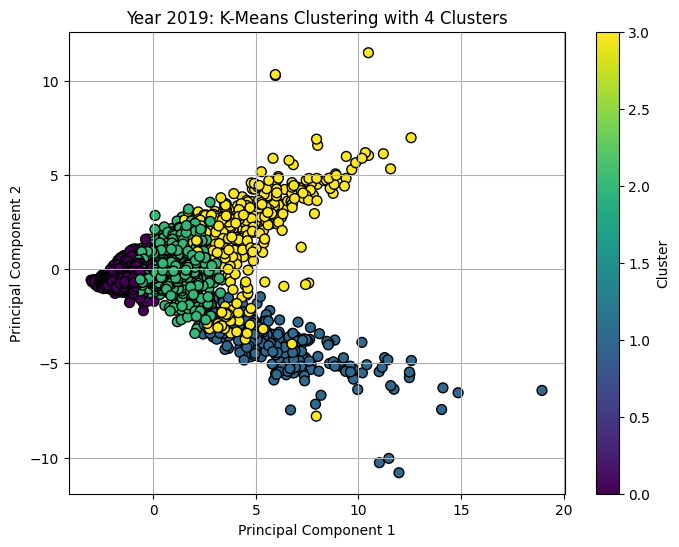

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


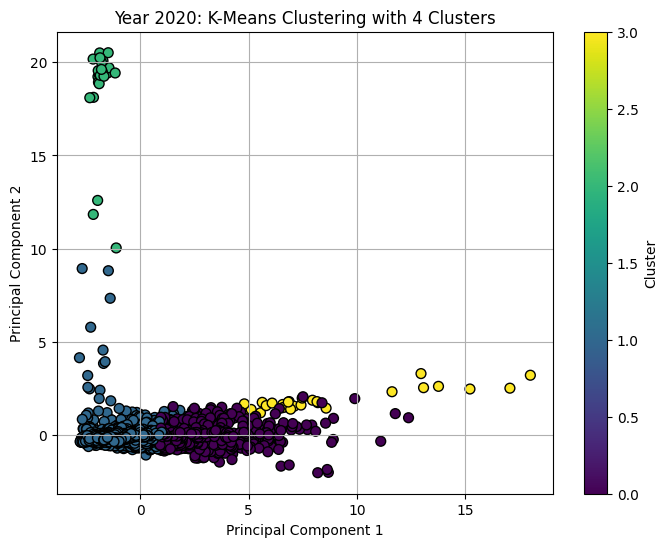

In [19]:
def cluster_and_visualize_by_year(data, n_clusters):
    """
    Perform K-Means clustering on air quality data for each year and visualize the results.

    Parameters:
    data (DataFrame): The air quality dataset.
    n_clusters (int): The number of clusters to use for K-Means clustering.
    """

    # Selecting relevant features for clustering
    features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

    # Identifying unique years
    unique_years = data['Year'].unique()

    for year in unique_years:
        # Extract data for the year
        year_data = data[data['Year'] == year][features]

        # Scale the features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(year_data)

        # KMeans clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)

        # PCA for dimensionality reduction
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(X_scaled)
        pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
        pca_df['Cluster'] = cluster_labels

        # Plotting
        plt.figure(figsize=(8, 6))
        plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
        plt.title(f'Year {year}: K-Means Clustering with {n_clusters} Clusters')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(label='Cluster')
        plt.grid(True)
        plt.show()


# Example usage
cluster_and_visualize_by_year(air_quality_data, 4)  # You can change the number of clusters


c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


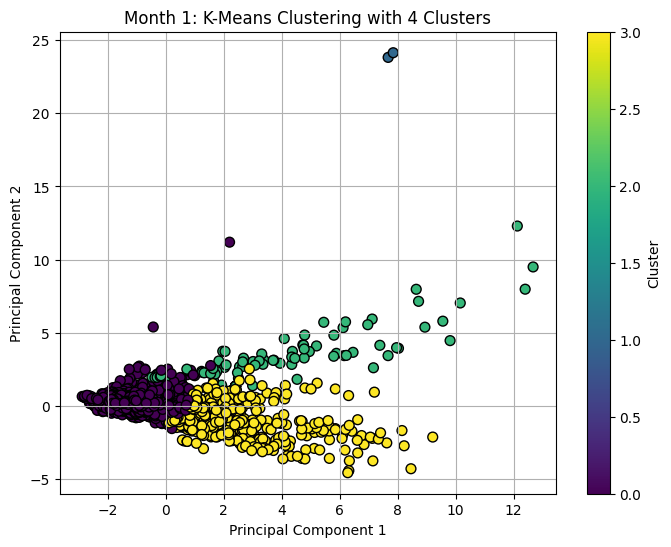

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


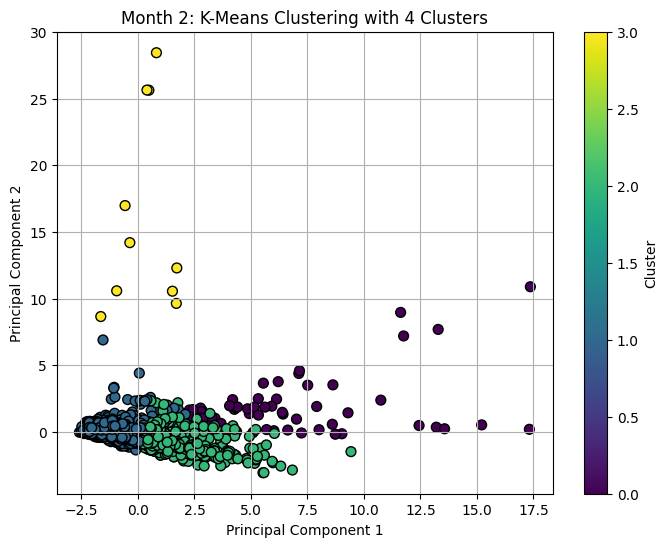

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


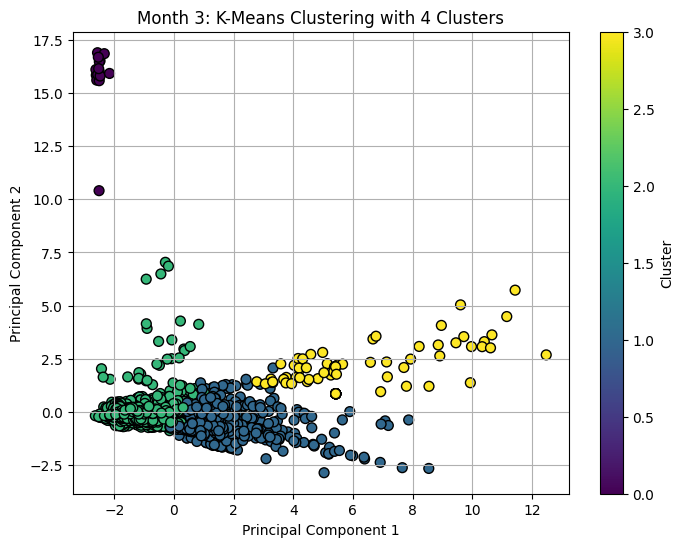

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


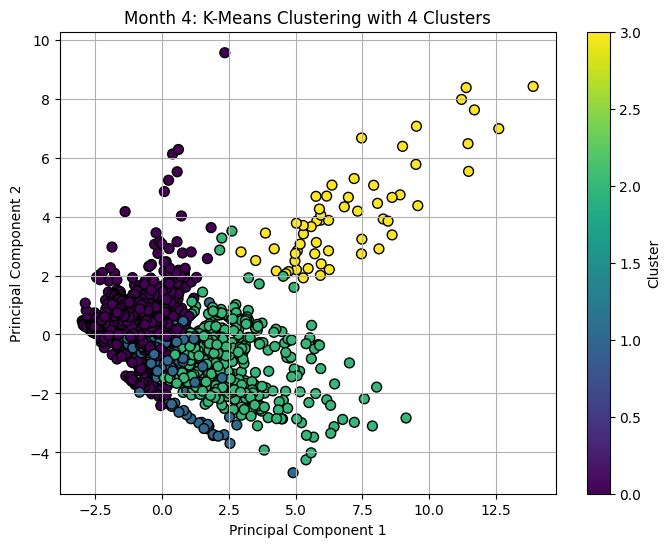

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


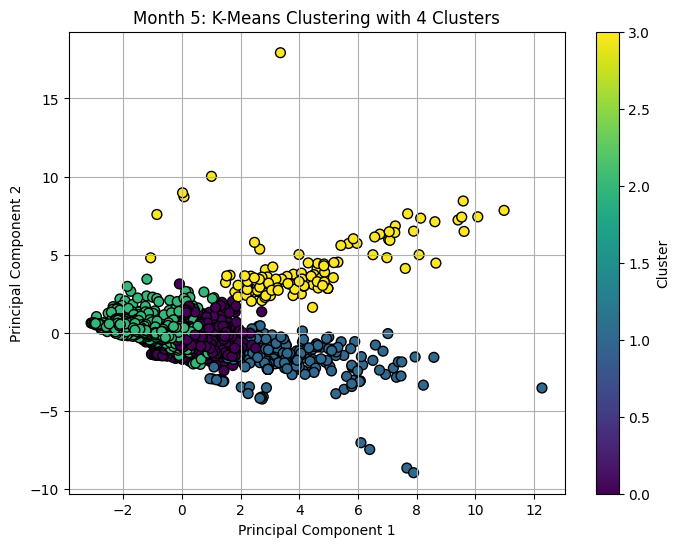

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


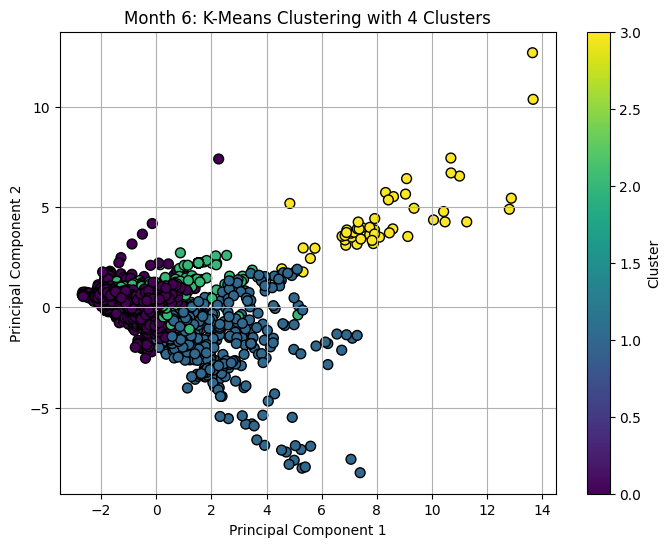

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


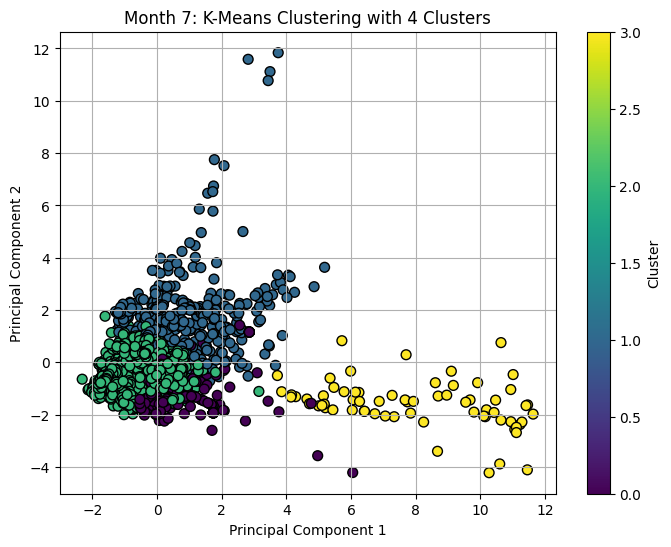

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


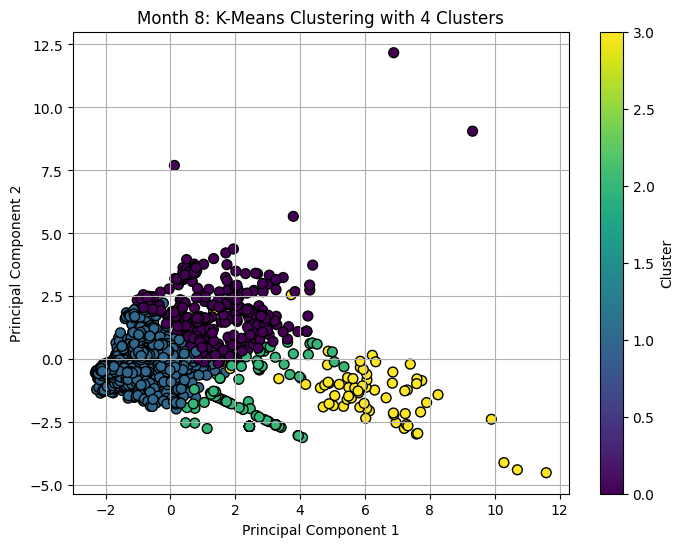

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


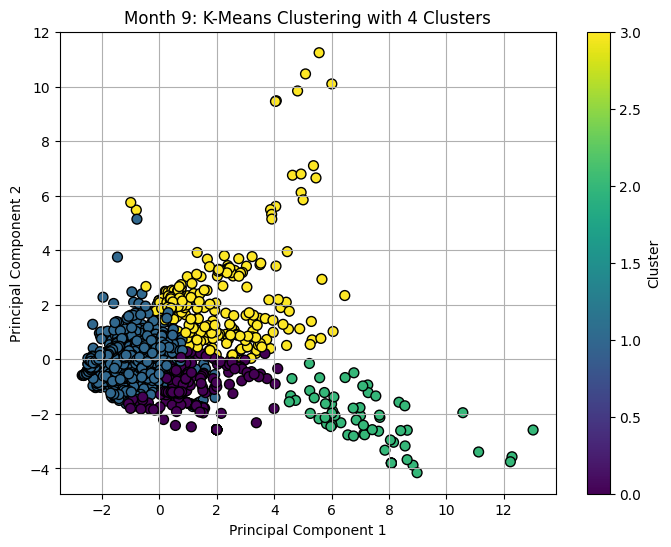

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


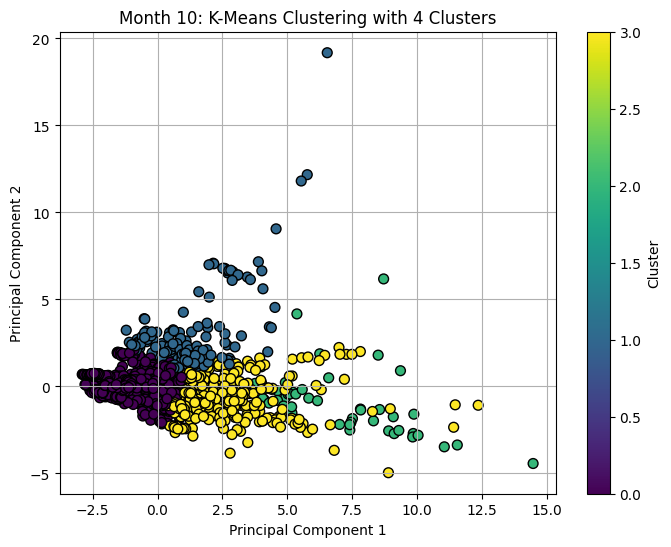

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


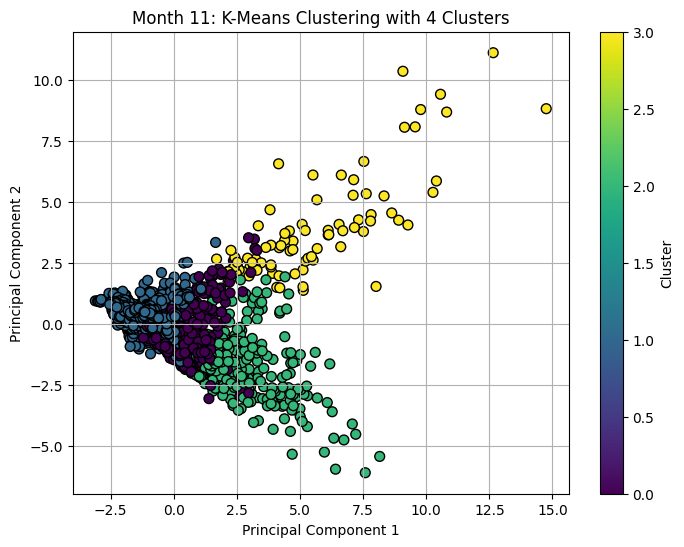

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


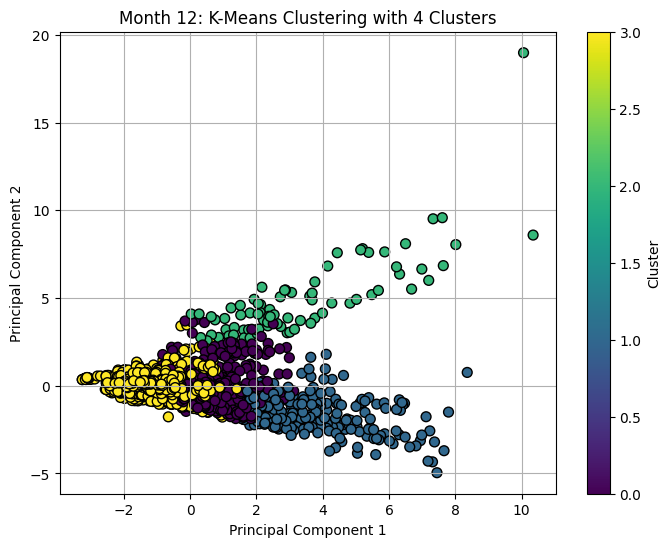

In [20]:
def cluster_and_visualize_by_month(data, n_clusters):
    """
    Perform K-Means clustering on air quality data for each month and visualize the results.

    Parameters:
    data (DataFrame): The air quality dataset.
    n_clusters (int): The number of clusters to use for K-Means clustering.
    """

    # Selecting relevant features for clustering
    features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

    # Identifying unique months
    unique_months = data['Month'].unique()

    for month in unique_months:
        # Extract data for the month
        month_data = data[data['Month'] == month][features]

        # Scale the features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(month_data)

        # KMeans clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)

        # PCA for dimensionality reduction
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(X_scaled)
        pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
        pca_df['Cluster'] = cluster_labels

        # Plotting
        plt.figure(figsize=(8, 6))
        plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
        plt.title(f'Month {month}: K-Means Clustering with {n_clusters} Clusters')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(label='Cluster')
        plt.grid(True)
        plt.show()

# Example usage
cluster_and_visualize_by_month(air_quality_data, 4)  # You can change the number of clusters


c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


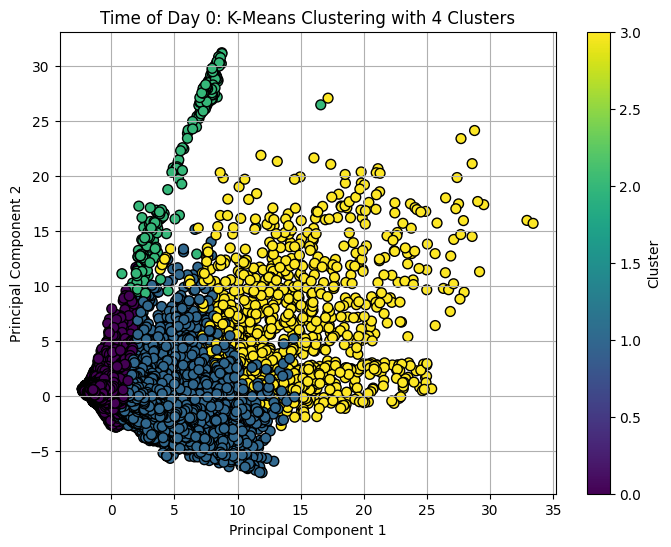

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


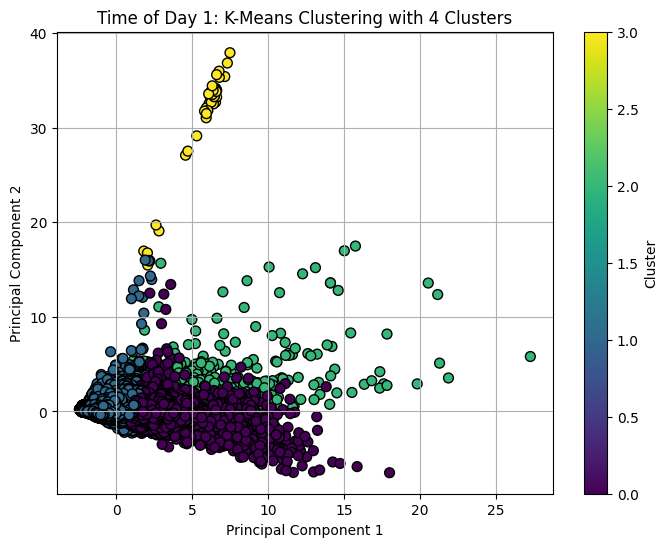

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


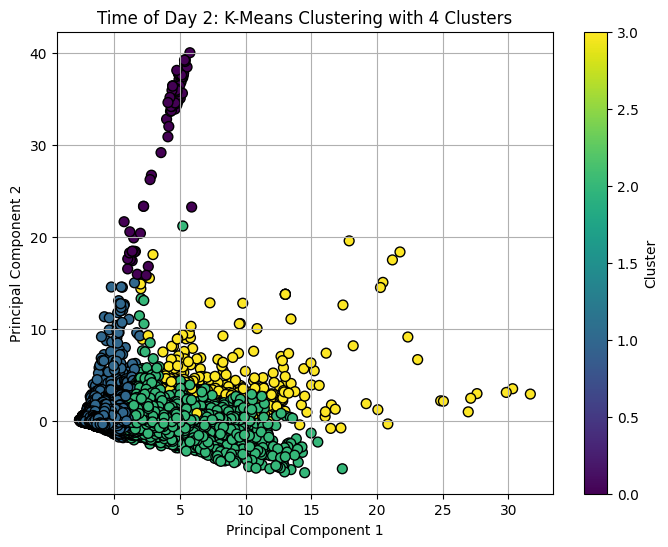

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


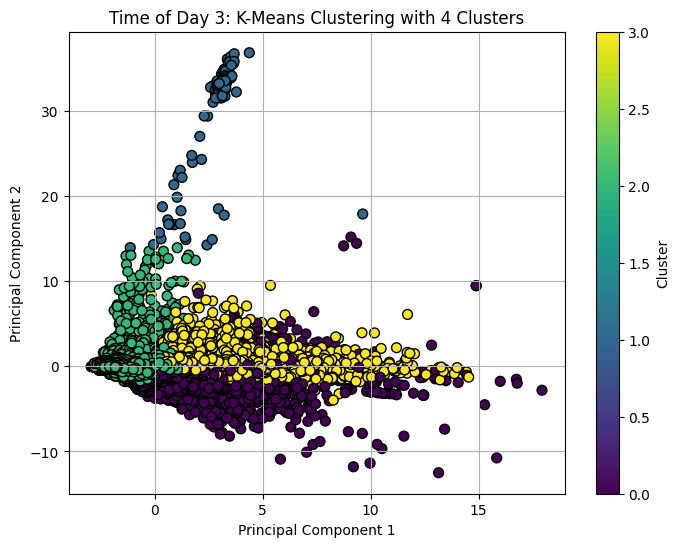

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


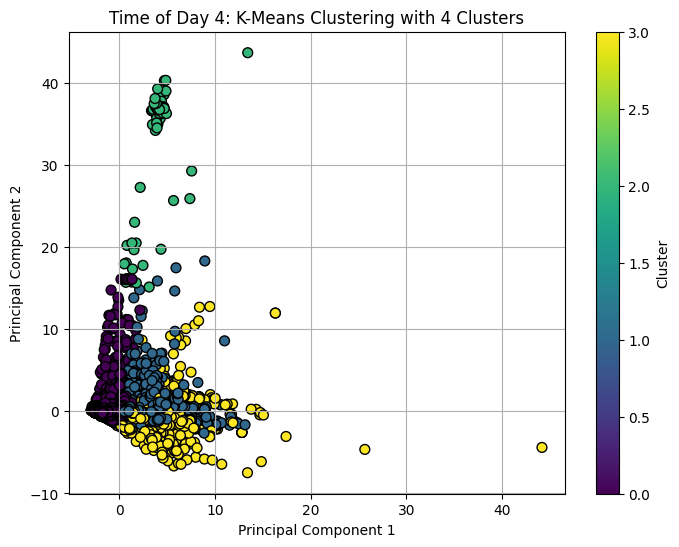

In [21]:
def cluster_and_visualize_by_month(data, n_clusters):
    """
    Perform K-Means clustering on air quality data for each month and visualize the results.

    Parameters:
    data (DataFrame): The air quality dataset.
    n_clusters (int): The number of clusters to use for K-Means clustering.
    """

    # Selecting relevant features for clustering
    features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

    # Identifying unique months
    unique_time = data['Times_Of_Day'].unique()

    for time in unique_time:
        # Extract data for the month
        time_data = data[data['Times_Of_Day'] == time][features]

        # Scale the features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(time_data)

        # KMeans clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)

        # PCA for dimensionality reduction
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(X_scaled)
        pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
        pca_df['Cluster'] = cluster_labels

        # Plotting
        plt.figure(figsize=(8, 6))
        plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
        plt.title(f'Time of Day {time}: K-Means Clustering with {n_clusters} Clusters')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(label='Cluster')
        plt.grid(True)
        plt.show()

# Load the dataset
file_path = 'clean_air_hour.csv'  # Replace with your file path
air_quality_data_hour = pd.read_csv(file_path)

# Example usage
cluster_and_visualize_by_month(air_quality_data_hour, 4)  # You can change the number of clusters
